# Lung Cancer Prediction

## Step 1 : Importing all the libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Step 2 : Loading the dataset


#### we can also download the data set from : 
https://www.kaggle.com/yusufdede/lung-cancer-dataset

=============================================
Lung cancer, also known as lung carcinoma, is a malignant lung tumor characterized by uncontrolled cell growth in tissues of the lung. This growth can spread beyond the lung by the process of metastasis into nearby tissue or other parts of the body.


        :Attributes:
        - Name	
        - Surname	
        - Age	
        - Smokes	
        - AreaQ	
        - Alkhol	
        - Result



In [2]:
#importing the dataset
df=pd.read_csv('lung_cancer.csv')

df.head(7)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0


## Step 3- Preprocessing


#### Exploratory Data Analysis

In [3]:
df.shape

(59, 7)

In [4]:
df.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [5]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

In [6]:
basic_EDA(df)

Number of Samples: 59,
Number of Features: 7,
Duplicated Entries: 0,
Null Entries: 0,
Number of Rows with Null Entries: 0 0.0%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
Name       59 non-null object
Surname    59 non-null object
Age        59 non-null int64
Smokes     59 non-null int64
AreaQ      59 non-null int64
Alkhol     59 non-null int64
Result     59 non-null int64
dtypes: int64(5), object(2)
memory usage: 3.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,59.0,42.627119,16.235230,18.0,29.0,39.0,55.0,77.0
Smokes,59.0,15.067797,7.984607,0.0,10.0,15.0,20.0,34.0
AreaQ,59.0,5.203390,2.461984,1.0,3.0,5.0,7.5,10.0
Alkhol,59.0,3.237288,2.380517,0.0,1.0,3.0,5.0,8.0
Result,59.0,0.474576,0.503640,0.0,0.0,0.0,1.0,1.0


.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- max tells us the maximum value of that feature.

In [9]:
# printing the nan values or missing values from the dataframe
print(df.isnull().sum())

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64


In [10]:
df['Result'].value_counts()

0    31
1    28
Name: Result, dtype: int64

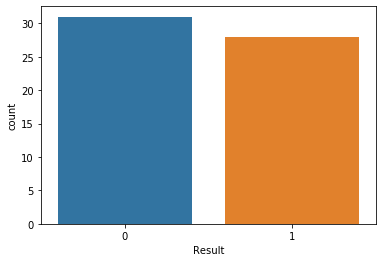

In [11]:
sns.countplot(df['Result'])

In [12]:
# Eliminating irrelevant variables in analysis such as name, surname
#drop the unnecessary features like name surname
df = df.drop(['Name','Surname'],axis=1)
print(df.shape)

(59, 5)


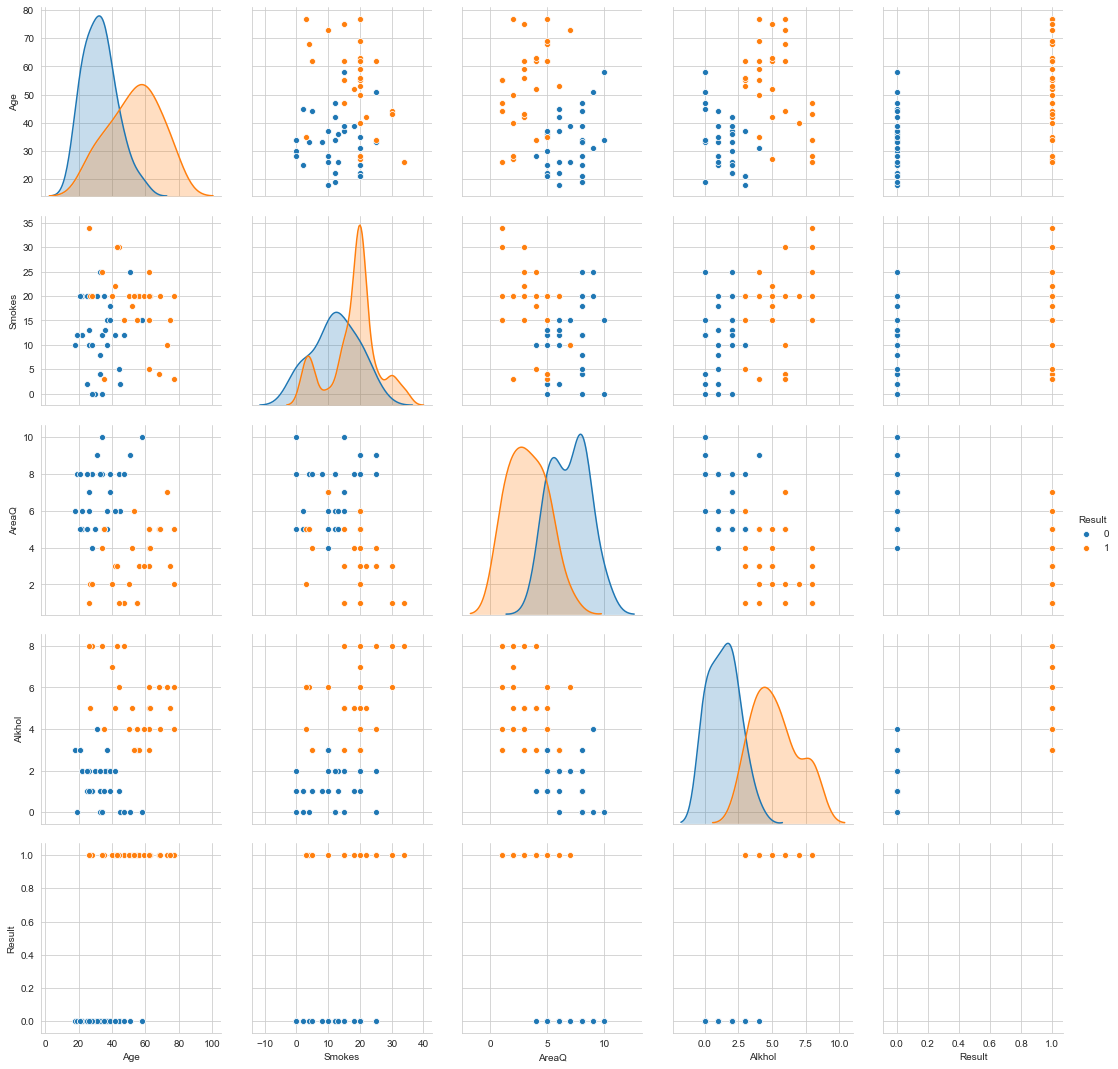

In [13]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Result",size=3);
plt.show()

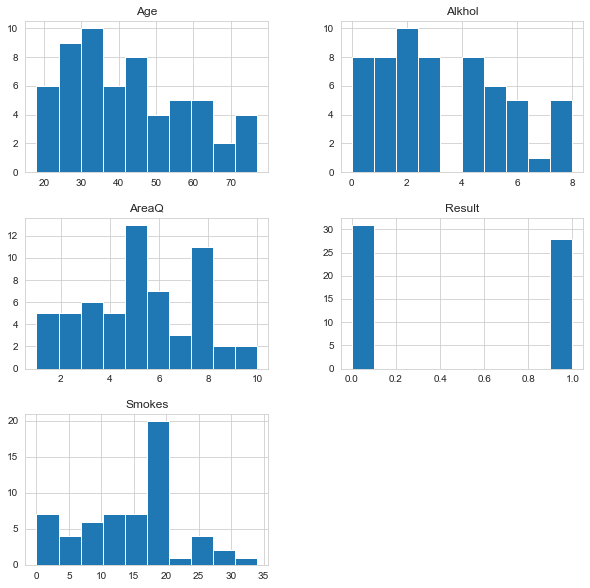

In [14]:
# plotting histogram graph
df.hist(figsize=(10,10))
plt.show()

In [15]:
df.corr()

,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Result,0.637726,0.373444,-0.746621,0.810439,1.000000


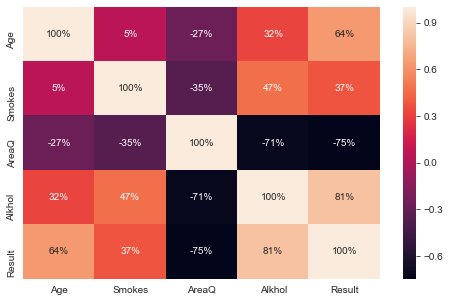

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

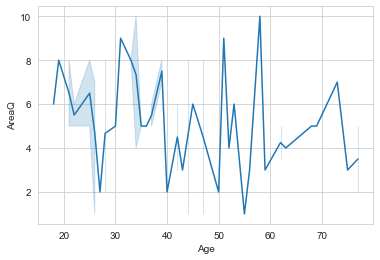

In [17]:
data=df.copy()
sns.lineplot(x=df['Age'],y=data['AreaQ'],data=data)

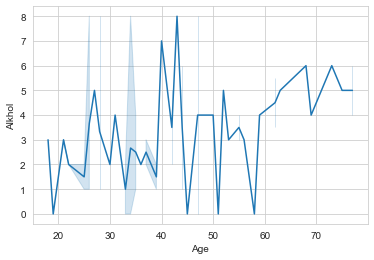

In [18]:
sns.lineplot(x=data['Age'],y=data['Alkhol'],data=data)

#### people belonging to age gropu 40-50 consumes more alcohol

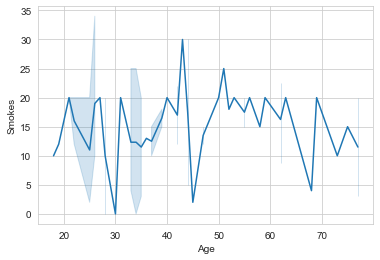

In [19]:
sns.lineplot(x=data['Age'],y=data['Smokes'],data=data)

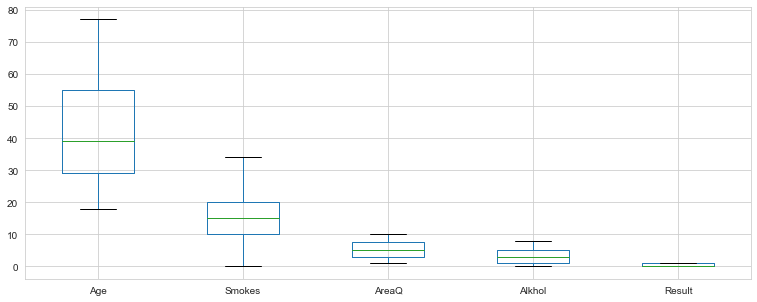

In [20]:
df.boxplot(figsize=(13,5))
plt.show()

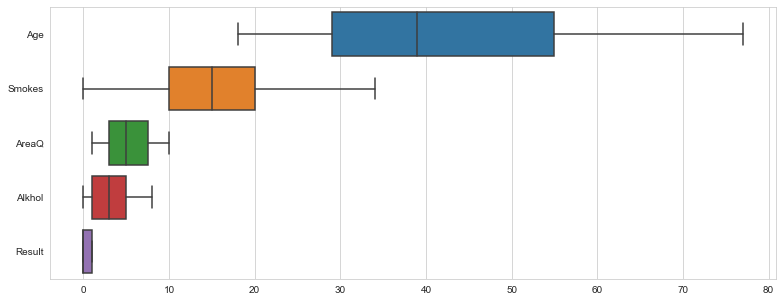

In [21]:

plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

As we can see there is no outlier .


## Step 4 : Splitting into dependant and independant variables

In [22]:
X=df.drop('Result',axis=1)
Y=df['Result']

X.shape,Y.shape

((59, 4), (59,))

## Step 5 : Splitting the datasets into 75% traning and 25% testing


In [23]:
#split the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=5)



In [24]:
print('The size of x_train :',X_train.shape)
print('The size of x_test :',X_test.shape)
print('The size of y_train :',Y_train.shape)
print('The size of y_test :',Y_test.shape)

The size of x_train : (44, 4)
The size of x_test : (15, 4)
The size of y_train : (44,)
The size of y_test : (15,)


## Step 6 : Feature Scaling


In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Scale the data to bring all features to the same level of magnitude, 
# which means the feature / independent data will be within a specific range for example 0–100 or 0–1.

In [26]:
print(X_train)

print('---------------')
print(X_test)

[[ 0.60711812  0.58935099 -1.26695775  0.24004205]
 [-0.70880293 -1.86860574  0.00967143 -0.57240796]
 [-0.0508424   0.58935099 -1.26695775  1.45871705]
 [ 0.67291417  1.20384017  1.71184367 -1.38485796]
 [ 2.38361153 -1.49991223 -1.26695775  1.05249205]
 [ 1.79144706 -1.37701439  0.00967143  1.05249205]
 [-1.3009674   0.58935099  0.00967143 -0.16618296]
 [-0.37982267 -1.49991223  0.00967143  0.24004205]
 [-0.44561872 -1.86860574  2.13738673 -1.38485796]
 [ 0.14654575  1.81832935 -0.84141469  1.86494205]
 [ 0.40972996 -0.3938317   1.28630061 -1.38485796]
 [-1.3009674   0.58935099  1.28630061 -0.16618296]
 [ 1.39667075  1.20384017 -0.84141469  0.24004205]
 [ 1.39667075 -0.02513819  0.00967143  0.64626705]
 [ 0.0807497  -0.3938317   0.43521449 -0.57240796]
 [ 0.40972996 -0.02513819 -1.6925008   1.86494205]
 [-0.51141477 -1.37701439  1.28630061 -1.38485796]
 [-0.97198714  2.3099207  -1.6925008   1.86494205]
 [ 1.39667075 -1.25411656 -0.41587163 -0.16618296]
 [-1.23517134  0.58935099  0.43

## Step 7 : Model Selection

### Train the model

In [27]:
def models(X_train,Y_train):
    
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  

  algos=['Logistic Regression','K Nearest Neighbor','SVM(Linear Classifier)',
         'SVM(RBF Classifier)','Naive Bayes','Decision Tree','Random Forest'] 
  
  accuracy = [log.score(X_train, Y_train),knn.score(X_train, Y_train),
              svc_lin.score(X_train, Y_train),svc_rbf.score(X_train, Y_train),
              gauss.score(X_train, Y_train),tree.score(X_train, Y_train),forest.score(X_train, Y_train)]
    
  
  
  for i in range(7):
      print([i],'{} Training Accuracy: {} %'.format(algos[i],round((accuracy[i])*100,2)))
  
  print("")
  print("Plotting accuracy Barplot......")
  color=['green','#0FBBAE','purple','red','orange','magenta','cyan']
  sns.set_style('whitegrid')
  plt.figure(figsize=(15,6)) #size of the graph
  plt.ylabel('Accuracy(%)')
  plt.title("Algorithm prediction")
  plt.xlabel('Algorithms')
  sns.barplot(x=algos,y=accuracy,palette=color)  
  plt.show()
  
    
  # using zip() to convert lists to dictionary
  training_acc = dict(zip(algos, accuracy))
  

  max_key = max(training_acc, key=training_acc.get)
  max_value = max(training_acc.values())

  print('The maximum training accuracy is given by {} model at {} %'.format(max_key,round(max_value,2)*100))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

[0] Logistic Regression Training Accuracy: 97.73 %
[1] K Nearest Neighbor Training Accuracy: 97.73 %
[2] SVM(Linear Classifier) Training Accuracy: 97.73 %
[3] SVM(RBF Classifier) Training Accuracy: 97.73 %
[4] Naive Bayes Training Accuracy: 97.73 %
[5] Decision Tree Training Accuracy: 100.0 %
[6] Random Forest Training Accuracy: 100.0 %

Plotting accuracy Barplot......


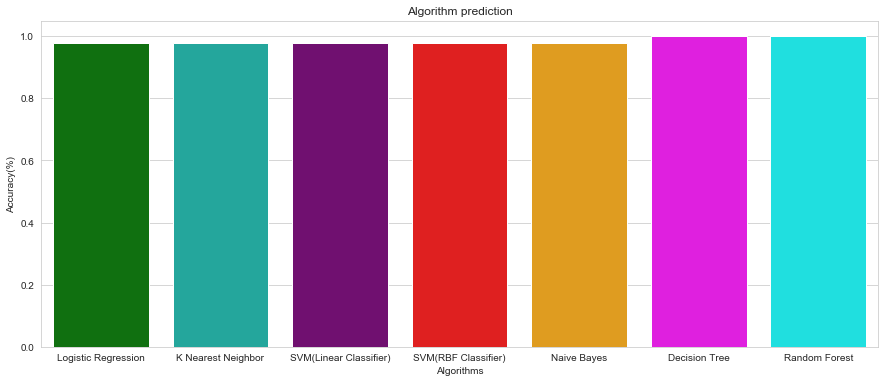

The maximum training accuracy is given by Decision Tree model at 100.0 %


In [28]:
model = models(X_train,Y_train)

### Test the model

In [29]:
model_name=['Logistic Regression','K Nearest Neighbor','SVM(Linear Classifier)',
         'SVM(RBF Classifier)','Naive Bayes','Decision Tree','Random Forest']

In [30]:
# test model accuracy on test data on confusion matrix

from sklearn.metrics import confusion_matrix
cMatrix=[]
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  cMatrix.append(cm)
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print("")
  print('Model[{}] {} Testing Accuracy = {} %'.format(i, model_name[i], round((TP + TN) / (TP + TN + FN + FP)*100 ,2)))
  
  print('------------')

[[8 0]
 [0 7]]

Model[0] Logistic Regression Testing Accuracy = 100.0 %
------------
[[8 0]
 [0 7]]

Model[1] K Nearest Neighbor Testing Accuracy = 100.0 %
------------
[[8 0]
 [0 7]]

Model[2] SVM(Linear Classifier) Testing Accuracy = 100.0 %
------------
[[8 0]
 [0 7]]

Model[3] SVM(RBF Classifier) Testing Accuracy = 100.0 %
------------
[[8 0]
 [0 7]]

Model[4] Naive Bayes Testing Accuracy = 100.0 %
------------
[[8 0]
 [0 7]]

Model[5] Decision Tree Testing Accuracy = 100.0 %
------------
[[8 0]
 [0 7]]

Model[6] Random Forest Testing Accuracy = 100.0 %
------------


In [31]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_auc_score
pred_lis=[]
for i in range(len(model)):
  print(f'Model {[i]} : {model_name[i]}')
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  pred_lis.append(accuracy_score(Y_test, model[i].predict(X_test))*100)
  print( "Accuracy is: {} %".format(pred_lis[i]))
  print( "ROC AUC score is: {} %".format(roc_auc_score(Y_test, model[i].predict(X_test))*100))

  print('---------------------')

Model [0] : Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy is: 100.0 %
ROC AUC score is: 100.0 %
---------------------
Model [1] : K Nearest Neighbor
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy is: 100.0 %
ROC AUC score is: 100.0 %
---------------------
Model [2] : SVM(Linear Classifier)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
 

In [32]:
    
data=list(zip(model_name,pred_lis))
result=pd.DataFrame(data,columns=['Model','Accuracy']).sort_values(["Accuracy"], ascending = False)
result

,Model,Accuracy
0,Logistic Regression,100.0
1,K Nearest Neighbor,100.0
2,SVM(Linear Classifier),100.0
3,SVM(RBF Classifier),100.0
4,Naive Bayes,100.0
5,Decision Tree,100.0
6,Random Forest,100.0


In [33]:
maxAcc = dict(zip(model_name,pred_lis))
max_key = max(maxAcc, key=maxAcc.get)
max_value = max(maxAcc.values())

print('The maximum  accuracy is given by {} model at {} %'.format(max_key,max_value))
print()
print(f'So we are going to choose {max_key} model for our project')


The maximum  accuracy is given by Logistic Regression model at 100.0 %

So we are going to choose Logistic Regression model for our project


accuracy comparison:-


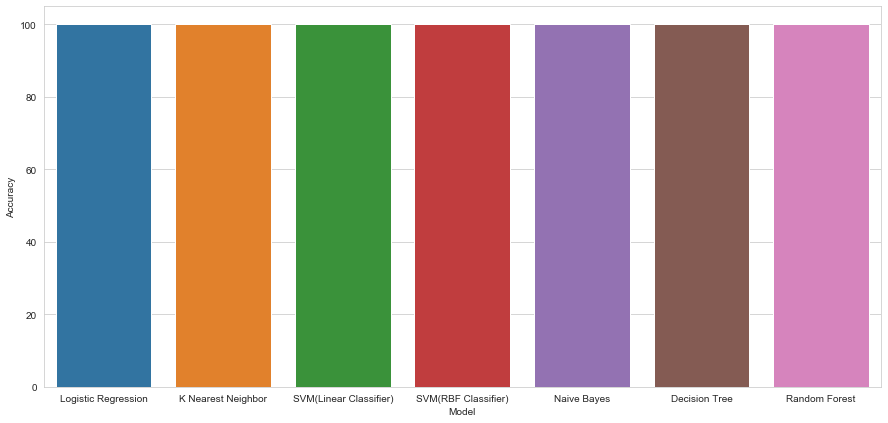

In [34]:
print("accuracy comparison:-")
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Accuracy", data = result)
plt.show()

In [35]:
ind = list(dict(data).keys()).index(max_key)
ind

0

confusion matrix for Logistic Regression plotted below :-


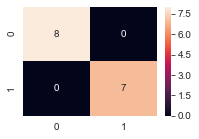

In [36]:
print(f'confusion matrix for {max_key} plotted below :-')

plt.figure(figsize=(3,2))
ax = sns.heatmap(cMatrix[ind], annot=True, fmt="d")
plt.show()

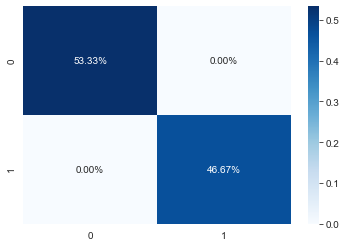

In [37]:
sns.heatmap(cMatrix[ind]/np.sum(cMatrix[ind]), annot=True, 
            fmt='.2%', cmap='Blues')

In [38]:
#Print Prediction of SVM model
pred = model[ind].predict(X_test)

print(pred)
print(pred.shape)

print('---------')

#Print the actual values
print(np.array(Y_test))


[1 1 0 1 1 1 1 0 0 1 0 0 0 0 0]
(15,)
---------
[1 1 0 1 1 1 1 0 0 1 0 0 0 0 0]


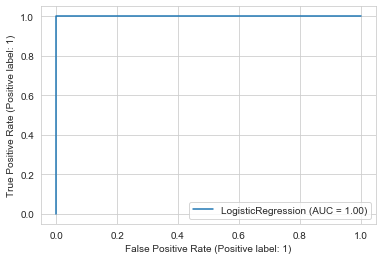

In [39]:
from sklearn import metrics
metrics.plot_roc_curve(model[ind], X_test, Y_test)  
plt.show() 

In [40]:
myFinalmodel = model[ind]
myFinalmodel

LogisticRegression(random_state=0)

## Model export in pickle file for used as backend with django

In [41]:
pd.to_pickle(myFinalmodel,r'C:\Users\msahi\OneDrive\Desktop\Diseae Prediction\models\lung-cancer-logistic.pickle')